<a href="https://colab.research.google.com/github/birdenly/network_analysis/blob/main/U2_Atividade_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1

Network Analysis with networkX using the dataset: https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download

### *Steam Video Games*

<blockquote class="epigraph" style=" padding: 10px">

Steam is the world's most popular PC Gaming hub, with over 6,000 games and a community of millions of gamers. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools are a highly valuable asset for Steam.
</blockquote>

## Network Basics

## Install NetworkX

In [1]:
!pip install networkx
!pip install adjustText
!pip install seaborn

## Import Libraries

In [2]:
import networkx
import pandas as pd
import seaborn as sns
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt
from adjustText import adjust_text

## *Steam Games* Network

The network data used is https://www.kaggle.com/datasets/tamber/steam-video-games?resource=download

| Network Element      | Steam |         
| :-------------: |:-------------:|
| Node    | steamID/Games |
| Edge     | Plays the same game      |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between User1 and User2:

User1 and User2 purcharsed and played Elden Ring

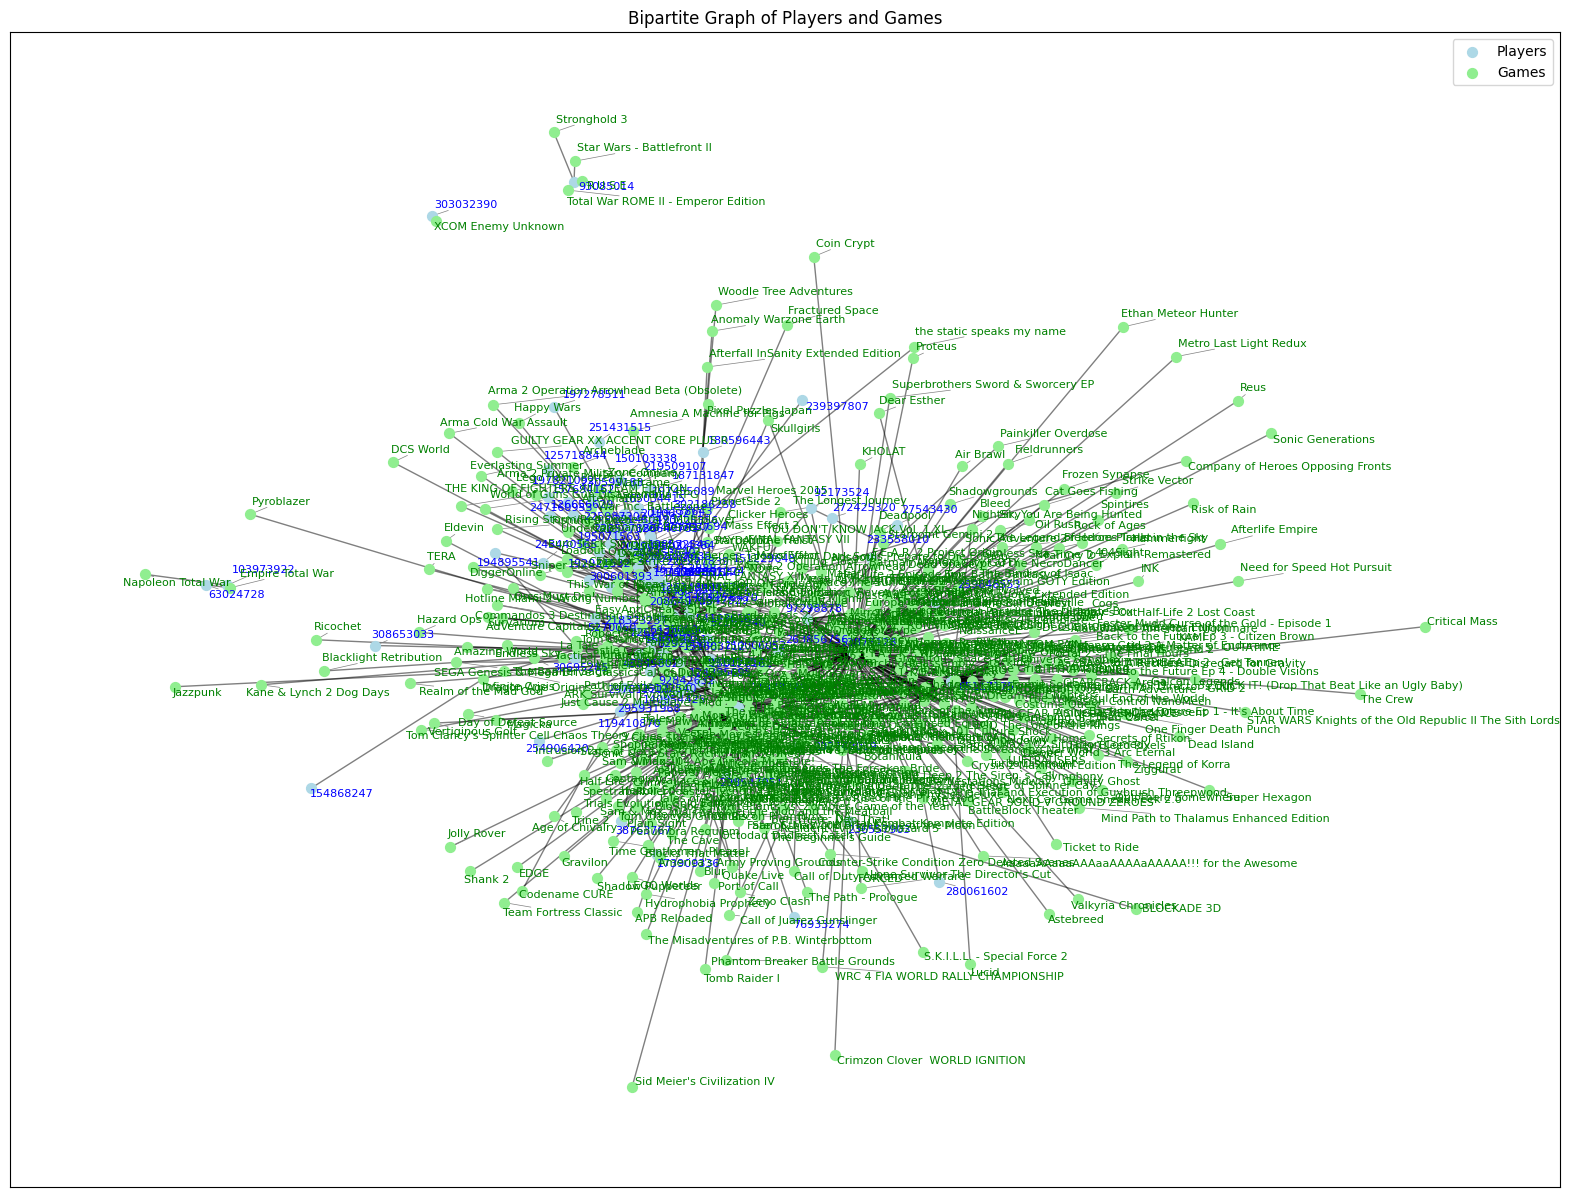

In [3]:
steam = pd.read_csv("https://raw.githubusercontent.com/birdenly/network_analysis/main/steam-200k.csv", header = None, names=["Player_ID", "Game_title", "Behavior", "Hours", "Ignore"],nrows=2500)
steam.head(5)

filtered_steam = steam[steam['Behavior'] == 'play'].drop_duplicates(subset=['Player_ID', 'Game_title'])

B = networkx.Graph()

players = filtered_steam['Player_ID'].unique()
games = filtered_steam['Game_title'].unique()

B.add_nodes_from(players, bipartite=0)
B.add_nodes_from(games, bipartite=1)

for index, row in filtered_steam.iterrows():
    B.add_edge(row['Player_ID'], row['Game_title'], weight=row['Hours'])

plt.figure(figsize=(20, 15))

pos = networkx.spring_layout(B, k=0.1)

networkx.draw_networkx_nodes(B, pos, nodelist=players, node_color='lightblue', node_size=50, label='Players')
networkx.draw_networkx_nodes(B, pos, nodelist=games, node_color='lightgreen', node_size=50, label='Games')

networkx.draw_networkx_edges(B, pos, alpha=0.5)

#nome azul para os steamIds (jogadores) se nao verde
texts = []
for node, (x, y) in pos.items():
    if node in players:
        texts.append(plt.text(x, y, str(node), fontsize=8, color='blue'))
    else:
        texts.append(plt.text(x, y, node, fontsize=8, color='green'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.legend(['Players', 'Games'], loc='upper right')

plt.title('Bipartite Graph of Players and Games')
plt.show()
#grafico com 2500 jogos mostrando aqueles que foram jogados, portanto comprados

In [4]:
steam

Player_ID                  Game_title  Behavior  Hours  Ignore
0     151603712  The Elder Scrolls V Skyrim  purchase    1.0       0
1     151603712  The Elder Scrolls V Skyrim      play  273.0       0
2     151603712                   Fallout 4  purchase    1.0       0
3     151603712                   Fallout 4      play   87.0       0
4     151603712                       Spore  purchase    1.0       0
...         ...                         ...       ...    ...     ...
2495  151229648                PlanetSide 2  purchase    1.0       0
2496  151229648                PlanetSide 2      play    6.4       0
2497  151229648          Marvel Heroes 2015  purchase    1.0       0
2498  151229648          Marvel Heroes 2015      play    4.6       0
2499  151229648               Left 4 Dead 2  purchase    1.0       0

[2500 rows x 5 columns]

## Create a Network From a Pandas DataFrame

In [5]:
G = networkx.from_pandas_edgelist(steam, source='Player_ID', target='Game_title', edge_attr='Behavior')

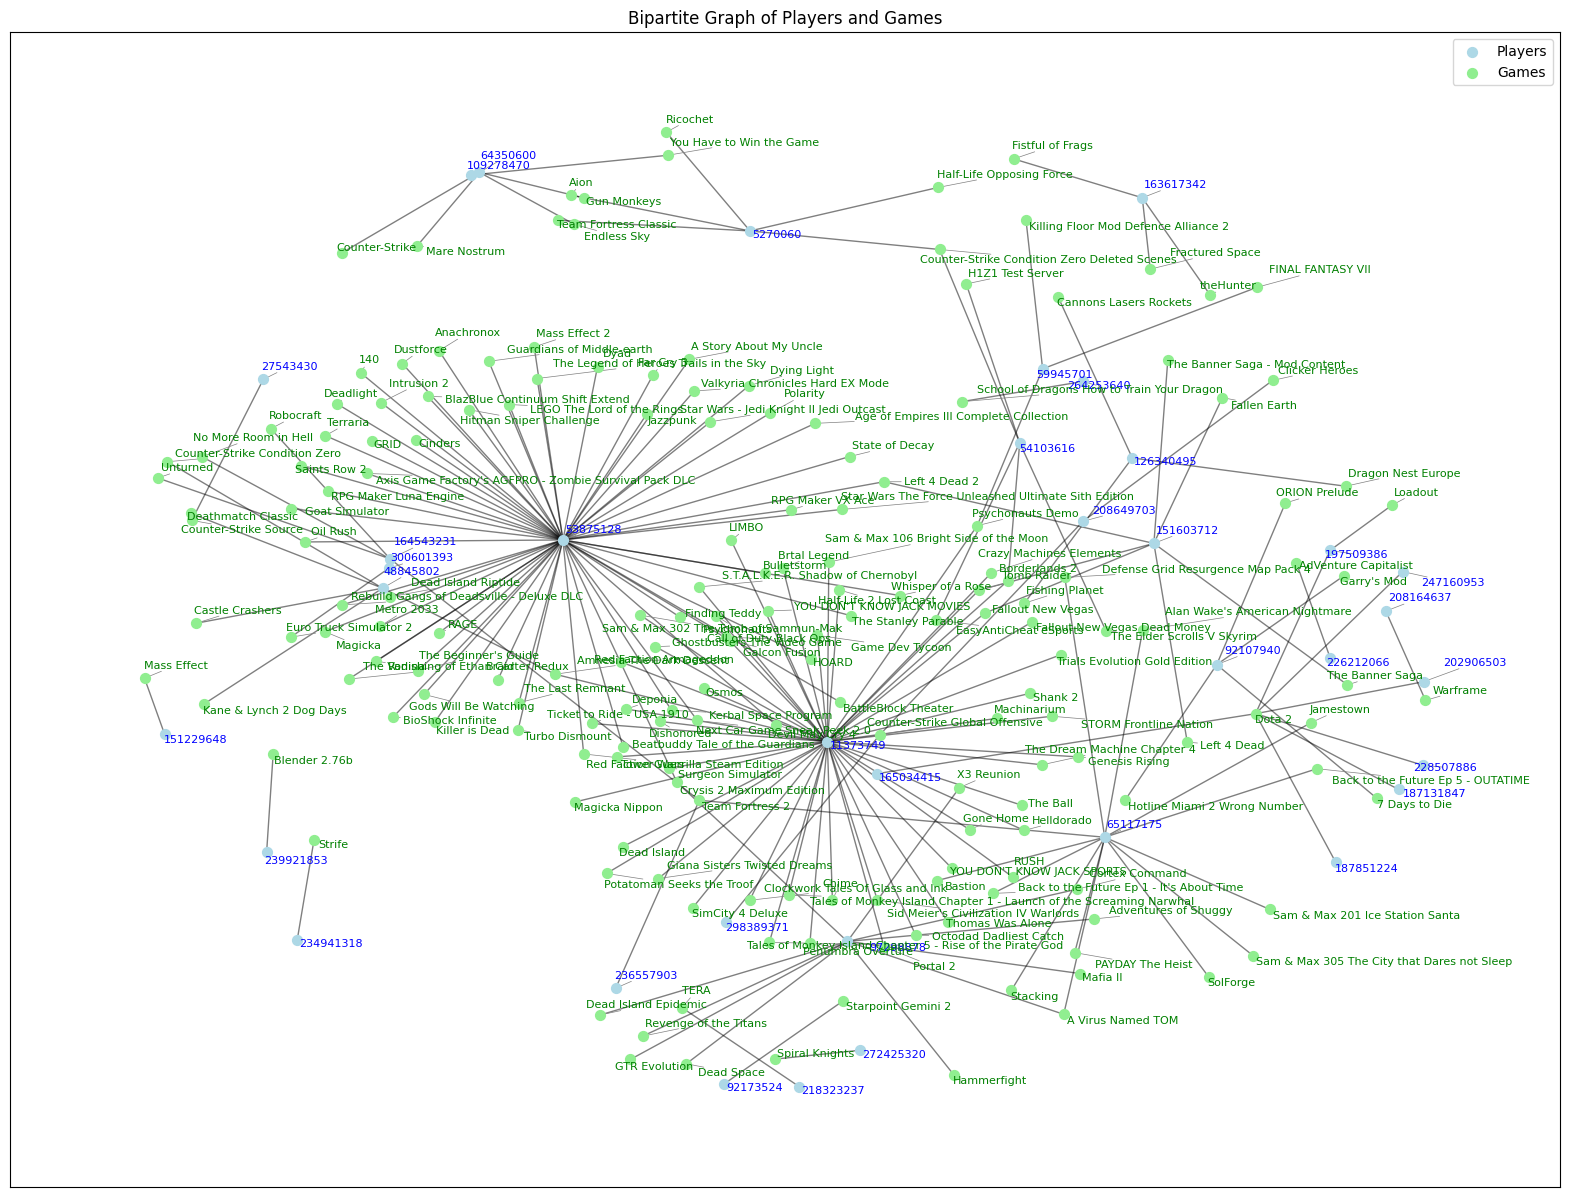

In [6]:
steam_sorted = steam.sort_values(by=['Behavior'], ascending=False)

filtered_steam = steam_sorted.drop_duplicates(subset=['Player_ID', 'Game_title'])

filtered_steam_sample = filtered_steam.sample(n=200)

B = networkx.Graph()

players = filtered_steam_sample['Player_ID'].unique()
games = filtered_steam_sample['Game_title'].unique()

B.add_nodes_from(players, bipartite=0)
B.add_nodes_from(games, bipartite=1)

for index, row in filtered_steam_sample.iterrows():
    B.add_edge(row['Player_ID'], row['Game_title'])

plt.figure(figsize=(20, 15))

pos = networkx.spring_layout(B, k=0.3)

networkx.draw_networkx_nodes(B, pos, nodelist=players, node_color='lightblue', node_size=50, label='Players')
networkx.draw_networkx_nodes(B, pos, nodelist=games, node_color='lightgreen', node_size=50, label='Games')

networkx.draw_networkx_edges(B, pos, alpha=0.5)

#nome azul para os steamIds (jogadores) se nao verde
texts = []
for node, (x, y) in pos.items():
    if node in players:
        texts.append(plt.text(x, y, str(node), fontsize=8, color='blue'))
    else:
        texts.append(plt.text(x, y, node, fontsize=8, color='green'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.legend(['Players', 'Games'], loc='upper right')

plt.title('Bipartite Graph of Players and Games')
plt.show()
#grafico organizado com sample de 200 mostrando aqueles que foram jogados como também aqueles que foram apenas foram comprados

## Calculate Degree

Who has the most number of connections in the network?

In [7]:
networkx.degree(G)

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 7, 'Fallout 4': 1, 'Spore': 2, 'Fallout New Vegas': 4, 'Left 4 Dead 2': 10, 'HuniePop': 1, 'Path of Exile': 2, 'Poly Bridge': 1, 'Left 4 Dead': 5, 'Team Fortress 2': 23, 'Tomb Raider': 4, 'The Banner Saga': 2, 'Dead Island Epidemic': 7, 'BioShock Infinite': 4, 'Dragon Age Origins - Ultimate Edition': 2, 'Fallout 3 - Game of the Year Edition': 2, 'SEGA Genesis & Mega Drive Classics': 1, 'Grand Theft Auto IV': 2, 'Realm of the Mad God': 2, 'Marvel Heroes 2015': 3, 'Eldevin': 1, 'Dota 2': 51, 'BioShock': 3, 'Robocraft': 4, "Garry's Mod": 7, 'Jazzpunk': 2, 'Alan Wake': 3, 'BioShock 2': 3, 'Fallen Earth': 1, "Fallout New Vegas Courier's Stash": 4, 'Fallout New Vegas Dead Money': 4, 'Fallout New Vegas Honest Hearts': 4, 'Grand Theft Auto Episodes from Liberty City': 2, 'Hitman Absolution': 3, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V Skyrim

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [8]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

## Degree Centrality

In [9]:
networkx.degree_centrality(G) #De todo o graph

{151603712: 0.035149384885764495,
 'The Elder Scrolls V Skyrim': 0.006151142355008787,
 'Fallout 4': 0.0008787346221441124,
 'Spore': 0.0017574692442882249,
 'Fallout New Vegas': 0.0035149384885764497,
 'Left 4 Dead 2': 0.008787346221441124,
 'HuniePop': 0.0008787346221441124,
 'Path of Exile': 0.0017574692442882249,
 'Poly Bridge': 0.0008787346221441124,
 'Left 4 Dead': 0.004393673110720562,
 'Team Fortress 2': 0.020210896309314587,
 'Tomb Raider': 0.0035149384885764497,
 'The Banner Saga': 0.0017574692442882249,
 'Dead Island Epidemic': 0.006151142355008787,
 'BioShock Infinite': 0.0035149384885764497,
 'Dragon Age Origins - Ultimate Edition': 0.0017574692442882249,
 'Fallout 3 - Game of the Year Edition': 0.0017574692442882249,
 'SEGA Genesis & Mega Drive Classics': 0.0008787346221441124,
 'Grand Theft Auto IV': 0.0017574692442882249,
 'Realm of the Mad God': 0.0017574692442882249,
 'Marvel Heroes 2015': 0.0026362038664323375,
 'Eldevin': 0.0008787346221441124,
 'Dota 2': 0.04481546

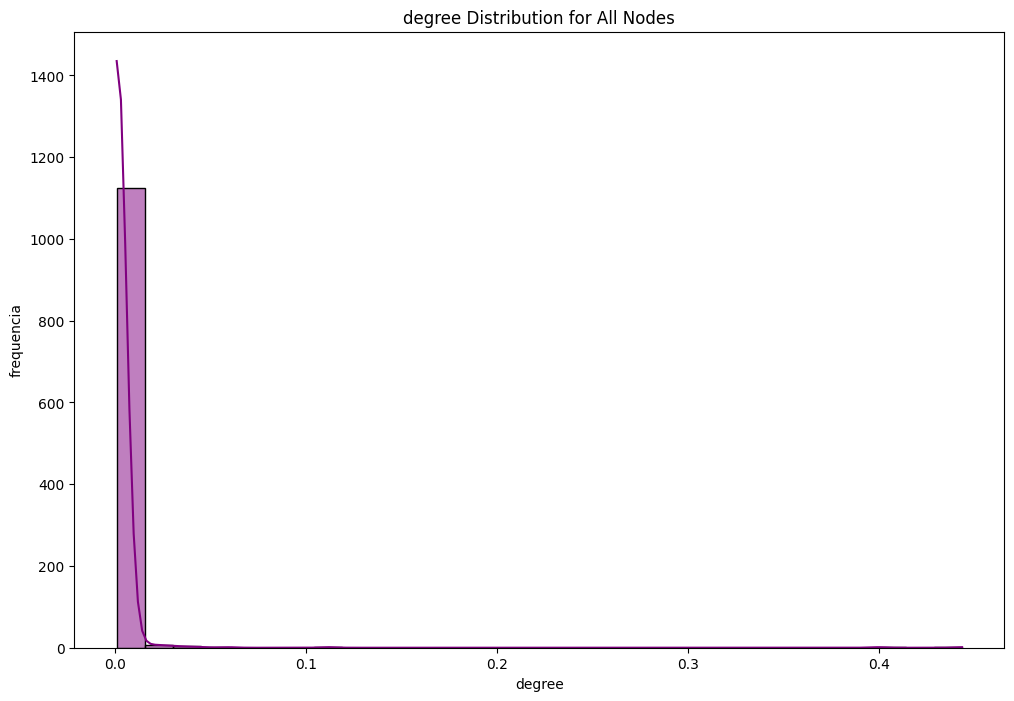

In [10]:
degree_centrality = networkx.degree_centrality(G)

df_degree = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'degree'])

plt.figure(figsize=(12, 8))
sns.histplot(df_degree['degree'], bins=30, kde=True, color='purple')
plt.title('degree Distribution for All Nodes')
plt.xlabel('degree')
plt.ylabel('frequencia')
plt.show()

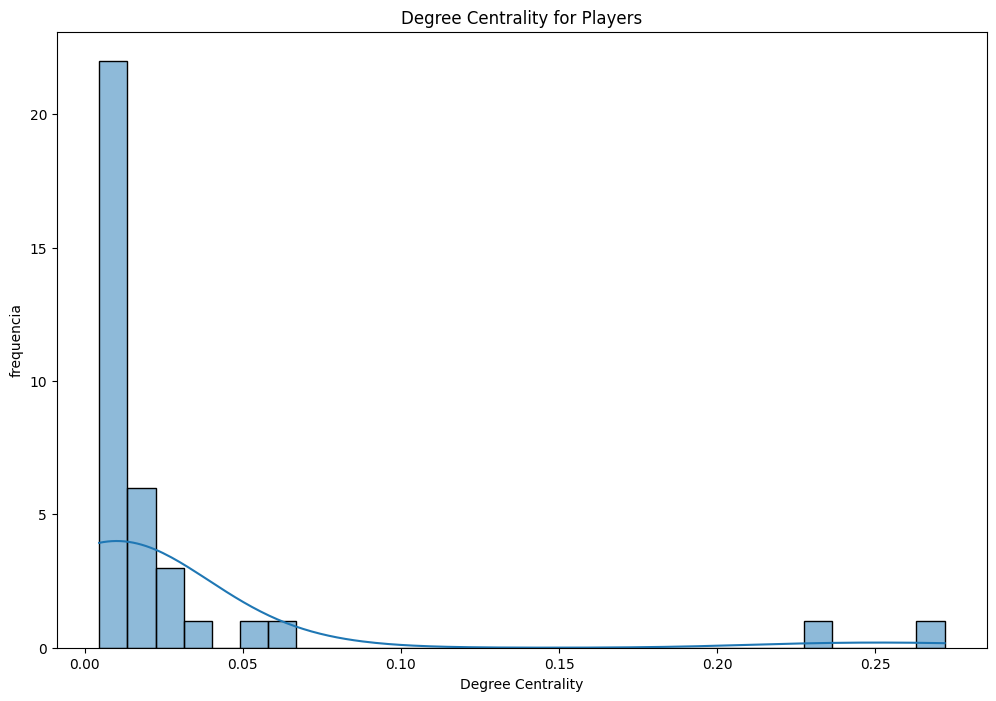

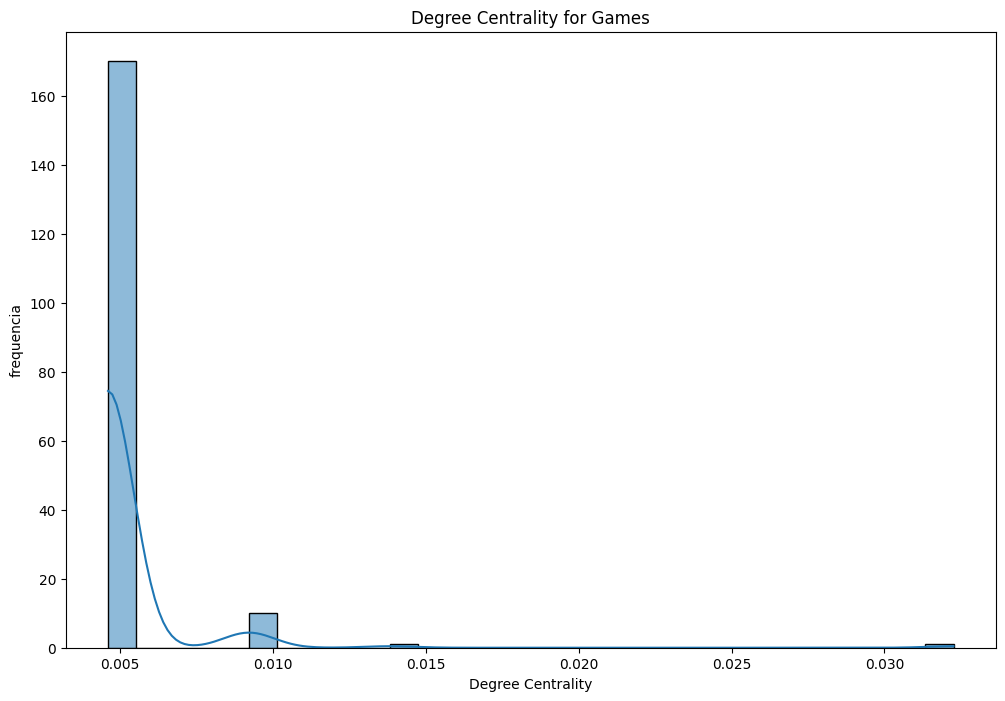

In [11]:
degree_centrality = networkx.degree_centrality(B)

player_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in players} #apenas players
game_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in games} #apenas games

df_player_centrality = pd.DataFrame(list(player_centrality.items()), columns=['Player_ID', 'Degree Centrality'])
df_game_centrality = pd.DataFrame(list(game_centrality.items()), columns=['Game_title', 'Degree Centrality'])

plt.figure(figsize=(12, 8))
sns.histplot(df_player_centrality['Degree Centrality'], bins=30, kde=True)
plt.title('Degree Centrality for Players')
plt.xlabel('Degree Centrality')
plt.ylabel('frequencia')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df_game_centrality['Degree Centrality'], bins=30, kde=True)
plt.title('Degree Centrality for Games')
plt.xlabel('Degree Centrality')
plt.ylabel('frequencia')
plt.show()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [12]:
networkx.degree(G, weight='Weight')

DegreeView({151603712: 40, 'The Elder Scrolls V Skyrim': 7, 'Fallout 4': 1, 'Spore': 2, 'Fallout New Vegas': 4, 'Left 4 Dead 2': 10, 'HuniePop': 1, 'Path of Exile': 2, 'Poly Bridge': 1, 'Left 4 Dead': 5, 'Team Fortress 2': 23, 'Tomb Raider': 4, 'The Banner Saga': 2, 'Dead Island Epidemic': 7, 'BioShock Infinite': 4, 'Dragon Age Origins - Ultimate Edition': 2, 'Fallout 3 - Game of the Year Edition': 2, 'SEGA Genesis & Mega Drive Classics': 1, 'Grand Theft Auto IV': 2, 'Realm of the Mad God': 2, 'Marvel Heroes 2015': 3, 'Eldevin': 1, 'Dota 2': 51, 'BioShock': 3, 'Robocraft': 4, "Garry's Mod": 7, 'Jazzpunk': 2, 'Alan Wake': 3, 'BioShock 2': 3, 'Fallen Earth': 1, "Fallout New Vegas Courier's Stash": 4, 'Fallout New Vegas Dead Money': 4, 'Fallout New Vegas Honest Hearts': 4, 'Grand Theft Auto Episodes from Liberty City': 2, 'Hitman Absolution': 3, 'HuniePop Official Digital Art Collection': 1, 'HuniePop Original Soundtrack': 1, 'The Banner Saga - Mod Content': 2, 'The Elder Scrolls V Skyrim

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [13]:
for index, row in filtered_steam.iterrows():
    B.add_edge(row['Player_ID'], row['Game_title'], weight=row['Hours'])
weighted_degrees = {node: sum(data['weight'] for _, _, data in B.edges(node, data=True)) for node in players}
weighted_degrees_df = pd.DataFrame(list(weighted_degrees.items()), columns=['Player_ID', 'Weighted_Degree'])
weighted_degrees_df

Player_ID  Weighted_Degree
0   187131847              1.0
1    11373749            455.0
2    92107940             11.0
3   247160953              1.0
4    53875128            505.0
5    54103616             31.0
6   197509386              3.0
7    97298878             67.0
8   163617342             22.0
9    59945701             43.0
10   48845802             15.0
11   65117175            127.0
12  151603712             40.0
13  165034415              1.0
14    5270060             18.0
15  264253640             16.0
16  126340495             29.0
17   92173524              3.0
18  151229648             10.0
19   64350600             33.0
20  164543231             11.0
21  187851224              2.0
22  272425320              2.0
23  208164637              4.0
24  218323237              3.0
25  234941318              1.0
26  239921853              6.0
27  226212066             13.0
28  202906503              1.0
29  208649703              4.0
30  236557903              4.0
31  300601393              2.0
32   27543430              5.0
33  109278470              9.0
34  298389371              3.0
35  228507886              1.0

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [14]:
networkx.betweenness_centrality(G)

{151603712: 0.026526708640667186,
 'The Elder Scrolls V Skyrim': 0.007901253128982313,
 'Fallout 4': 0.0,
 'Spore': 0.0005295784479143428,
 'Fallout New Vegas': 0.0027921893715016116,
 'Left 4 Dead 2': 0.019963539409043884,
 'HuniePop': 0.0,
 'Path of Exile': 7.243353072798062e-05,
 'Poly Bridge': 0.0,
 'Left 4 Dead': 0.003923089572885322,
 'Team Fortress 2': 0.037939331349685135,
 'Tomb Raider': 0.003737221294836697,
 'The Banner Saga': 0.0005295784479143428,
 'Dead Island Epidemic': 0.010654007436660298,
 'BioShock Infinite': 0.0028056035332645565,
 'Dragon Age Origins - Ultimate Edition': 0.0005295784479143428,
 'Fallout 3 - Game of the Year Edition': 0.0003445951837836176,
 'SEGA Genesis & Mega Drive Classics': 0.0,
 'Grand Theft Auto IV': 0.0005295784479143428,
 'Realm of the Mad God': 5.796022665143194e-05,
 'Marvel Heroes 2015': 0.00036834017299659447,
 'Eldevin': 0.0,
 'Dota 2': 0.10422841883123456,
 'BioShock': 0.001947983900424621,
 'Robocraft': 0.0003318417996574277,
 "Garry

## Communities

Who forms distinct communities within this network?

In [15]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [16]:
# Convert all node identifiers to strings for consistency
G = networkx.relabel_nodes(G, {node: str(node) for node in G.nodes()})

# Now try running the community detection again
communities = community.greedy_modularity_communities(G, weight="Hours")

In [17]:
communities

[frozenset({'11373749',
            '4 Elements',
            '7 Grand Steps, Step 1 What Ancients Begat',
            '9 Clues The Secret of Serpent Creek',
            '92173524',
            '92842632',
            'Abyss The Wraiths of Eden',
            'AirBuccaneers',
            'Alchemy Mysteries Prague Legends',
            'Alice Madness Returns',
            'Aliens vs. Predator',
            'Alter Ego',
            'Always Sometimes Monsters',
            'Anodyne',
            'Anomaly Korea',
            'Antichamber',
            "Assassin's Creed Brotherhood",
            'Aura Fate of the Ages',
            'BEEP',
            'Back to Bed',
            'Banished',
            'BattleBlock Theater',
            'Beatbuddy Tale of the Guardians',
            'Bejeweled 3',
            'Ben There, Dan That!',
            'Beware Planet Earth',
            'Blackwell Epiphany',
            'Blocks That Matter',
            'Blue Toad Murder Files - The Mysteries of Litt

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [18]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [19]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [20]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [21]:
communities_df

node  modularity_class
1129           303032390                17
1130  XCOM Enemy Unknown                17
1039           214167822                16
1040            Bad Rats                16
1037           211277578                15
...                  ...               ...
850             The Cave                 0
849          Plain Sight                 0
848          Spectraball                 0
847     Penumbra Requiem                 0
789     The Walking Dead                 0

[1139 rows x 2 columns]

Inspect each community in the network

In [22]:
communities_df[communities_df['modularity_class'] == 17]

node  modularity_class
1129           303032390                17
1130  XCOM Enemy Unknown                17

In [23]:
communities_df[communities_df['modularity_class'] == 8]

node  modularity_class
109                 DayZ                 8
165          Mass Effect                 8
1138        PlanetSide 2                 8
424        Mass Effect 2                 8
1137           Starbound                 8
1136               WAKFU                 8
1135           151229648                 8
20    Marvel Heroes 2015                 8

In [24]:
communities_df[communities_df['modularity_class'] == 2]

node  modularity_class
579                              Loadout                 2
1065                           124395695                 2
587                            194895541                 2
1060                           154868247                 2
589                            170625356                 2
...                                  ...               ...
24                             Robocraft                 2
17    SEGA Genesis & Mega Drive Classics                 2
25                           Garry's Mod                 2
26                              Jazzpunk                 2
27                             Alan Wake                 2

[196 rows x 2 columns]

In [25]:
communities_df[communities_df['modularity_class'] == 1]

node  modularity_class
214        Mind Path to Thalamus Enhanced Edition                 1
227  AaaaaAAaaaAAAaaAAAAaAAAAA!!! for the Awesome                 1
211                                     Air Brawl                 1
212                              Cat Goes Fishing                 1
213                        One Finger Death Punch                 1
..                                            ...               ...
434                         Mitsurugi Kamui Hikae                 1
367                                        FarSky                 1
471         Shadowrun Dragonfall - Director's Cut                 1
352                               Devil May Cry 4                 1
472                             Shadowrun Returns                 1

[312 rows x 2 columns]

In [26]:
communities_df[communities_df['modularity_class'] == 0]

node  modularity_class
986           Tomb Raider Underworld                 0
965                  The Bard's Tale                 0
985  Tomb Raider The Last Revelation                 0
964                          Tengami                 0
975           The Maw River Redirect                 0
..                               ...               ...
850                         The Cave                 0
849                      Plain Sight                 0
848                      Spectraball                 0
847                 Penumbra Requiem                 0
789                 The Walking Dead                 0

[333 rows x 2 columns]

Plot a sample of 40 characters with their modularity class indicated by a star

In [27]:
import seaborn as sns

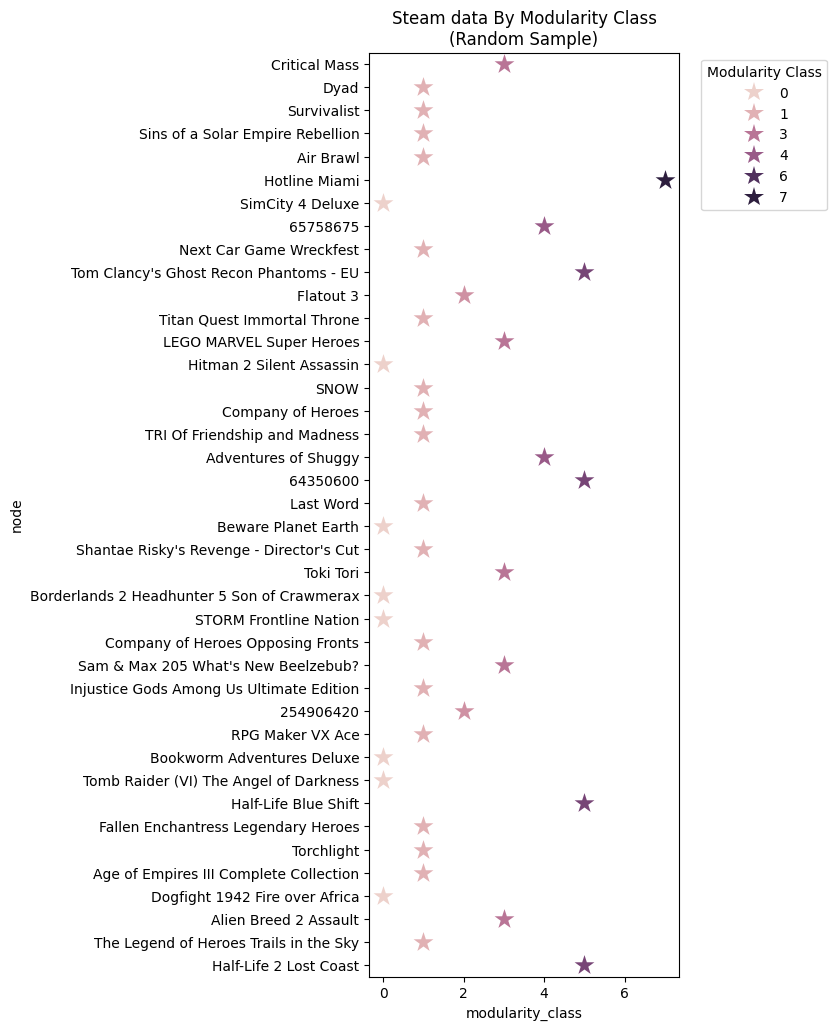

In [28]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class\n(Random Sample)")
plt.show()

random 200 samples with their modularity class

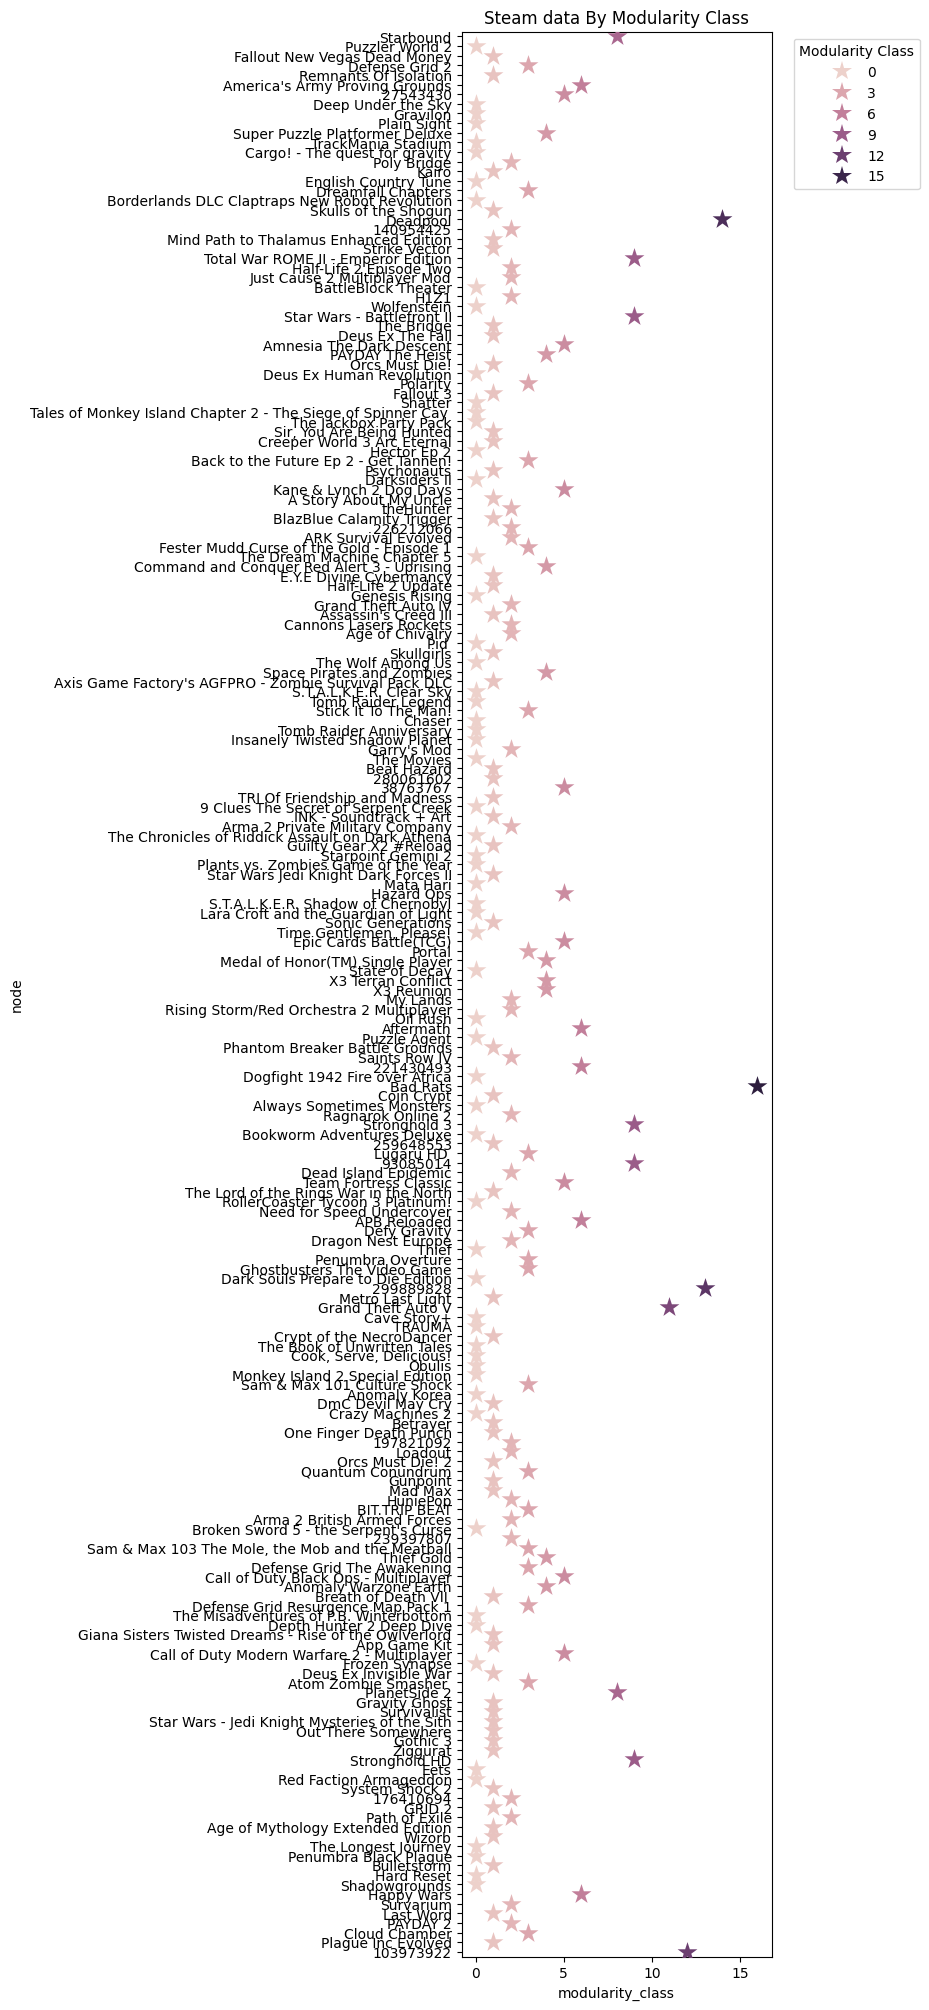

In [29]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(200),
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

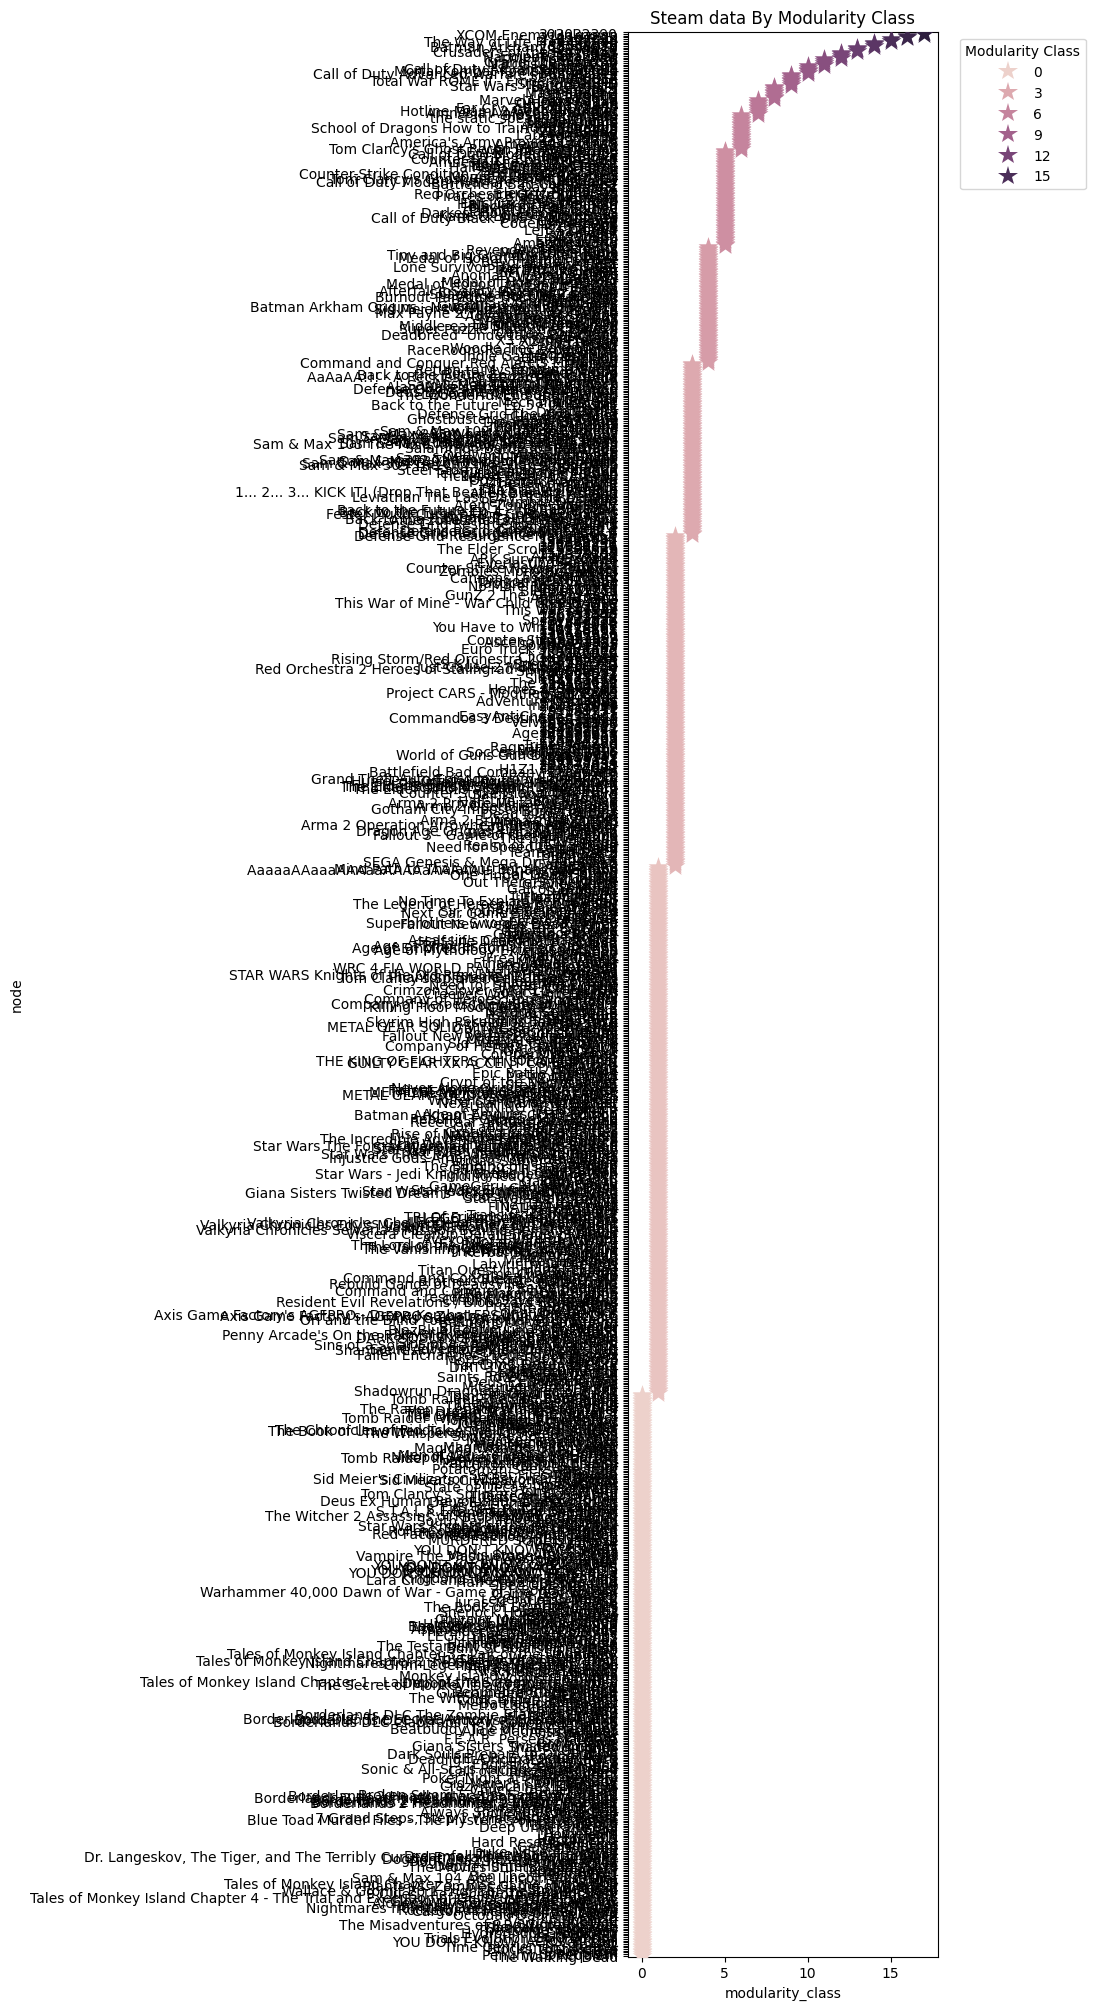

In [30]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Steam data By Modularity Class")
plt.show()

## Adjacency matrix

In [31]:
print(networkx.adjacency_matrix(B).todense()) #B por ser o graph menor

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Diameter

In [32]:
networkx.is_connected(G) #Por ser um graph bipartido é dificil ele ser conectado, portanto não se pode achar o diametro dele.

#networkx.diameter(G) # Erro: Found infinite path length because the graph is not connected

False

Mas podemos achar todos os subgrafos que são conectados e medir o maior deles

In [33]:
connected_components = list(networkx.connected_components(B))

max_diameter = []
for component in connected_components:
    subgraph = B.subgraph(component)
    if len(subgraph) > 1:
        diameter = networkx.diameter(subgraph)
        max_diameter.append(diameter)

for i, diameter in enumerate(max_diameter, 1):
    print(f"Diametro {i}: {diameter}")

Diametro 1: 10
Diametro 2: 1
Diametro 3: 1
Diametro 4: 1
Diametro 5: 3
Diametro 6: 2


## Periphery

In [34]:
networkx.is_connected(G) #Por ser um graph bipartido é dificil ele ser conectado, portanto não se pode achar a periferia dele.

#networkx.periphery(G) # Erro: Found infinite path length because the graph is not connected

False

Mas podemos achar todos os subgrafos que são conectados e achar a periferia de cada um deles

In [35]:
connected_components = list(networkx.connected_components(B))

peripheries = []
for component in connected_components:
    subgraph = B.subgraph(component)
    if len(subgraph) > 1:
        periphery = networkx.periphery(subgraph)
        peripheries.append(periphery)

for i, periphery in enumerate(peripheries, 1):
    print(f"Periferia {i}: {periphery}")

Periferia 1: ['Deadpool', 'Total War ROME II - Emperor Edition', 'R.U.S.E', 'Stronghold 3', 'R.U.S.E.', 'Stronghold HD', 'Free to Play']
Periferia 2: [214167822, 'Bad Rats']
Periferia 3: [211277578, 'The Way of Life Free Edition']
Periferia 4: ['XCOM Enemy Unknown', 303032390]
Periferia 5: [63024728, 'Napoleon Total War']
Periferia 6: ['GASP', 'Crusaders of the Lost Idols']


## Empirical Degree Distribution

Text(0, 0.5, 'Frequencia')

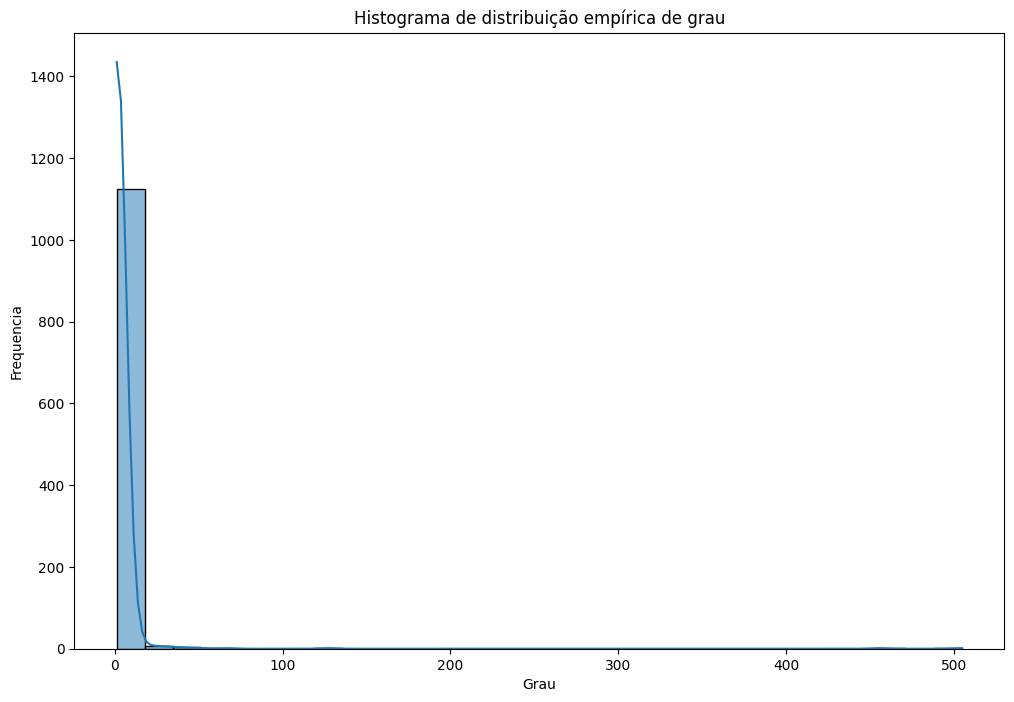

In [36]:
plt.figure(figsize=(12, 8))
sns.histplot(degrees, bins=30, kde=True)
plt.title('Histograma de distribuição empírica de grau')
plt.xlabel('Grau')
plt.ylabel('Frequencia')#ou seja quantidade de nos
#Alta quantidade de elementos que se conectam pouco a outros. Provavelmente em sua maioria jogos de nicho.

## Local Clustering of the first 35 players

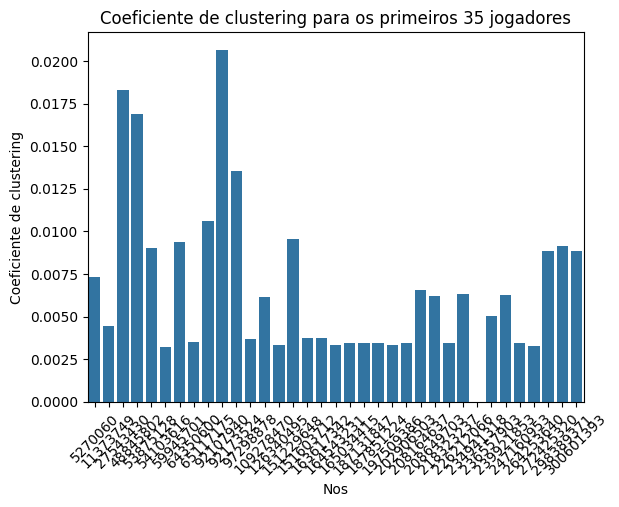

In [37]:
# cria novo grafico de players que serão conectados caso se liguem ao mesmo jogo, necessario já que graficos bipartidos normalmente tem clustering 0
player_projection = networkx.bipartite.weighted_projected_graph(B, players)

clustering_coeffs = networkx.clustering(player_projection, weight='weight')

selected_nodes = list(clustering_coeffs.keys())[:35]
selected_clustering_coeffs = {node: clustering_coeffs[node] for node in selected_nodes}

df_clustering = pd.DataFrame(list(selected_clustering_coeffs.items()), columns=['nos', 'clustering'])

sns.barplot(x='nos', y='clustering', data=df_clustering)
plt.title('Coeficiente de clustering para os primeiros 35 jogadores')
plt.xlabel('Nos')
plt.ylabel('Coeficiente de clustering')
plt.xticks(rotation=45)
plt.show()
#Maior clustering = joga jogos mais populares

## Clustering global

In [38]:
print("Coeficiente de clustering global: ",networkx.transitivity(player_projection)) # Utilizando o mesmo grafico da celula passada, necessario já que graficos bipartidos normalmente tem clustering 0

for i in networkx.clustering(player_projection).values():
  print(i)

Coeficiente de clustering global:  0.47477079348327944
0.5420408163265306
0.2491885143570537
0.9166666666666666
0.5420408163265306
0.2595959595959596
0.2761904761904762
0.5060331825037707
0.34937402190923317
0.40604198668714797
0.5378787878787878
0.6410256410256411
0.5586206896551724
0.3318918918918919
0.5420408163265306
0.4959677419354839
0.4758909853249476
0.2996913580246914
0.7
0.7435897435897436
0.3576300085251492
0.3362162162162162
0.5420408163265306
0.9333333333333333
0.7307692307692307
0.5135746606334841
0
0.7424242424242424
0.5042016806722689
0.5420408163265306
0.6190476190476191
0.6307692307692307
1.0
0.8571428571428571
0.5276292335115864
0.9090909090909091
0.5420408163265306
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7761904761904762
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8285714285714286
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7355072463768116
1.0
1.0
1.0
1.0
1.0
0.9428571428571428
1.0
1.0
1.0
0.75
1.0
1.0
1.0
1.0
1.0
1.0
0.7684210526315789
1.0
0.8717948717948718
0.8636363636363636


## Strongly Connected Components and Weakly Connect Components

In [39]:
#Nem o graph ou seus sub grafos são direcionados
print(networkx.is_directed(G))
print(networkx.is_directed(player_projection))
print(networkx.is_directed(B))
#networkx.is_strongly_connected(G) # not implemented for undirected type
#networkx.is_weakly_connected(G) # not implemented for undirected type

False
False
False


## Closeness centrality

In [40]:
networkx.closeness_centrality(G)

{'151603712': 0.33824467948635717,
 'The Elder Scrolls V Skyrim': 0.40857770248021397,
 'Fallout 4': 0.2520735508048827,
 'Spore': 0.33021036405912774,
 'Fallout New Vegas': 0.4032445635065781,
 'Left 4 Dead 2': 0.43375526760964994,
 'HuniePop': 0.2520735508048827,
 'Path of Exile': 0.2521878698755425,
 'Poly Bridge': 0.2520735508048827,
 'Left 4 Dead': 0.40353719381391234,
 'Team Fortress 2': 0.3643999037192472,
 'Tomb Raider': 0.39976581817079165,
 'The Banner Saga': 0.33021036405912774,
 'Dead Island Epidemic': 0.3486358953451857,
 'BioShock Infinite': 0.40034143489961926,
 'Dragon Age Origins - Ultimate Edition': 0.33021036405912774,
 'Fallout 3 - Game of the Year Edition': 0.3181202820798462,
 'SEGA Genesis & Mega Drive Classics': 0.2520735508048827,
 'Grand Theft Auto IV': 0.33021036405912774,
 'Realm of the Mad God': 0.25391518405277225,
 'Marvel Heroes 2015': 0.2548461288155688,
 'Eldevin': 0.2520735508048827,
 'Dota 2': 0.35760402127046376,
 'BioShock': 0.39919185432560744,
 '

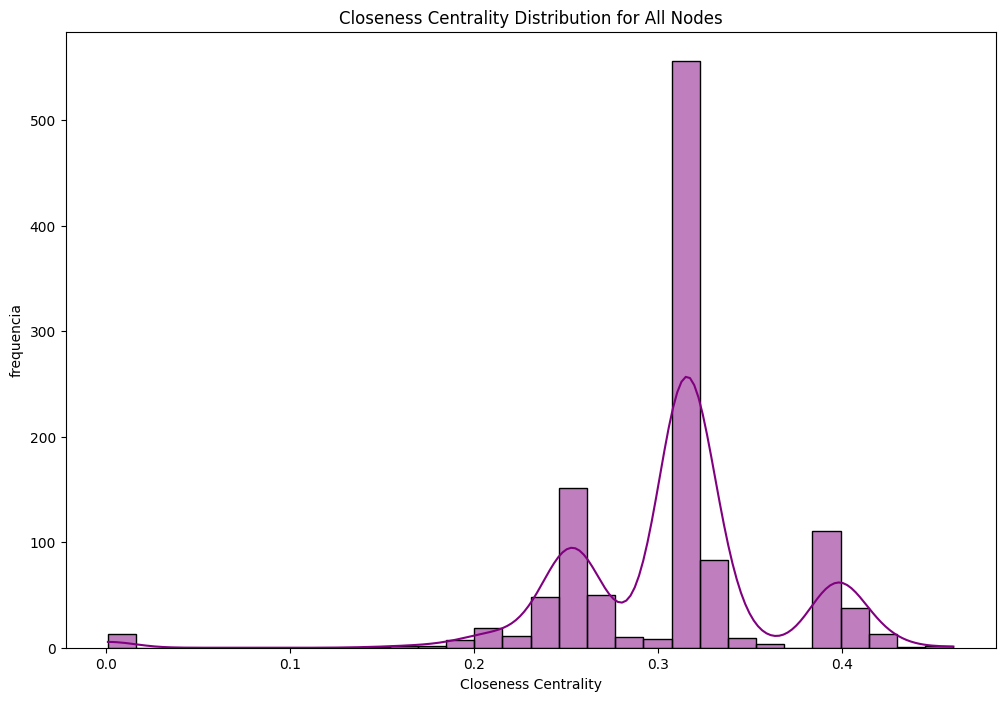

In [41]:
closeness_centrality = networkx.closeness_centrality(B)

df_closeness = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

plt.figure(figsize=(12, 8))
sns.histplot(df_closeness['Closeness Centrality'], bins=30, kde=True, color='purple')
plt.title('Closeness Centrality Distribution for All Nodes')
plt.xlabel('Closeness Centrality')
plt.ylabel('frequencia')
plt.show()

## Betweenness Centrality

In [42]:
networkx.betweenness_centrality(G)

{'151603712': 0.026526708640667186,
 'The Elder Scrolls V Skyrim': 0.007901253128982313,
 'Fallout 4': 0.0,
 'Spore': 0.0005295784479143428,
 'Fallout New Vegas': 0.0027921893715016116,
 'Left 4 Dead 2': 0.019963539409043884,
 'HuniePop': 0.0,
 'Path of Exile': 7.243353072798062e-05,
 'Poly Bridge': 0.0,
 'Left 4 Dead': 0.003923089572885322,
 'Team Fortress 2': 0.037939331349685135,
 'Tomb Raider': 0.0037372212948366982,
 'The Banner Saga': 0.0005295784479143428,
 'Dead Island Epidemic': 0.010654007436660298,
 'BioShock Infinite': 0.0028056035332645565,
 'Dragon Age Origins - Ultimate Edition': 0.0005295784479143428,
 'Fallout 3 - Game of the Year Edition': 0.0003445951837836176,
 'SEGA Genesis & Mega Drive Classics': 0.0,
 'Grand Theft Auto IV': 0.0005295784479143428,
 'Realm of the Mad God': 5.796022665143195e-05,
 'Marvel Heroes 2015': 0.00036834017299659447,
 'Eldevin': 0.0,
 'Dota 2': 0.10422841883123453,
 'BioShock': 0.001947983900424621,
 'Robocraft': 0.00033184179965742777,
 "G

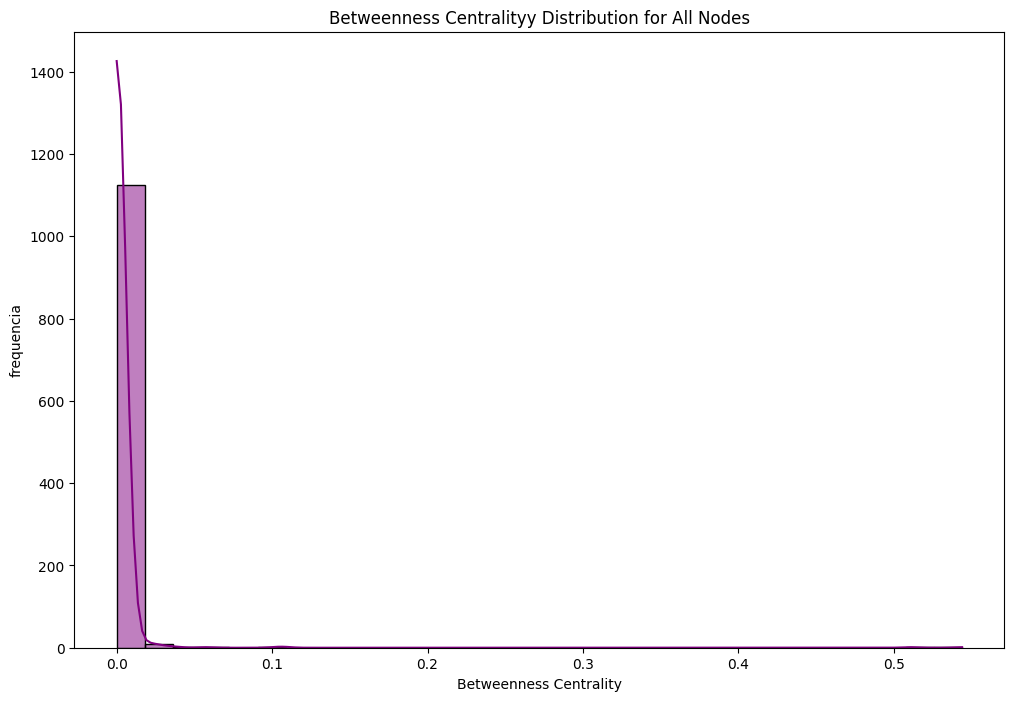

In [43]:
betweenness_centrality = networkx.betweenness_centrality(G)

df_between = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness Centrality'])

plt.figure(figsize=(12, 8))
sns.histplot(df_between['Betweenness Centrality'], bins=30, kde=True, color='purple')
plt.title('Betweenness Centralityy Distribution for All Nodes')
plt.xlabel('Betweenness Centrality')
plt.ylabel('frequencia')
plt.show()

## Eigenvector Centrality

In [44]:
networkx.eigenvector_centrality(B,max_iter=2500, tol=1e-08)

{187131847: 0.0009921529321871092,
 11373749: 0.45776899302758056,
 92107940: 0.009547239143969587,
 247160953: 0.0009921529321871092,
 53875128: 0.5251768008714733,
 54103616: 0.02449294482554361,
 197509386: 0.001024661928349543,
 97298878: 0.05010396967443362,
 163617342: 0.006334301472291169,
 59945701: 0.03829092648449537,
 48845802: 0.011024342199881765,
 65117175: 0.08521868275570611,
 151603712: 0.03420574052540364,
 165034415: 0.0009921529321871092,
 5270060: 0.013093104920279024,
 264253640: 0.0010948030878319037,
 126340495: 0.011917416801443426,
 92173524: 0.002336850306178968,
 151229648: 0.004396159398564253,
 64350600: 0.014245953211662863,
 164543231: 0.008090830798667521,
 187851224: 0.0009936554780049164,
 272425320: 0.0016972407163757188,
 208164637: 0.0010496632487452873,
 218323237: 0.002539408280815316,
 234941318: 1.6580022570895283e-06,
 239921853: 0.000992192257587687,
 226212066: 0.006978573036309977,
 202906503: 0.0009921529321871092,
 208649703: 0.0024971762

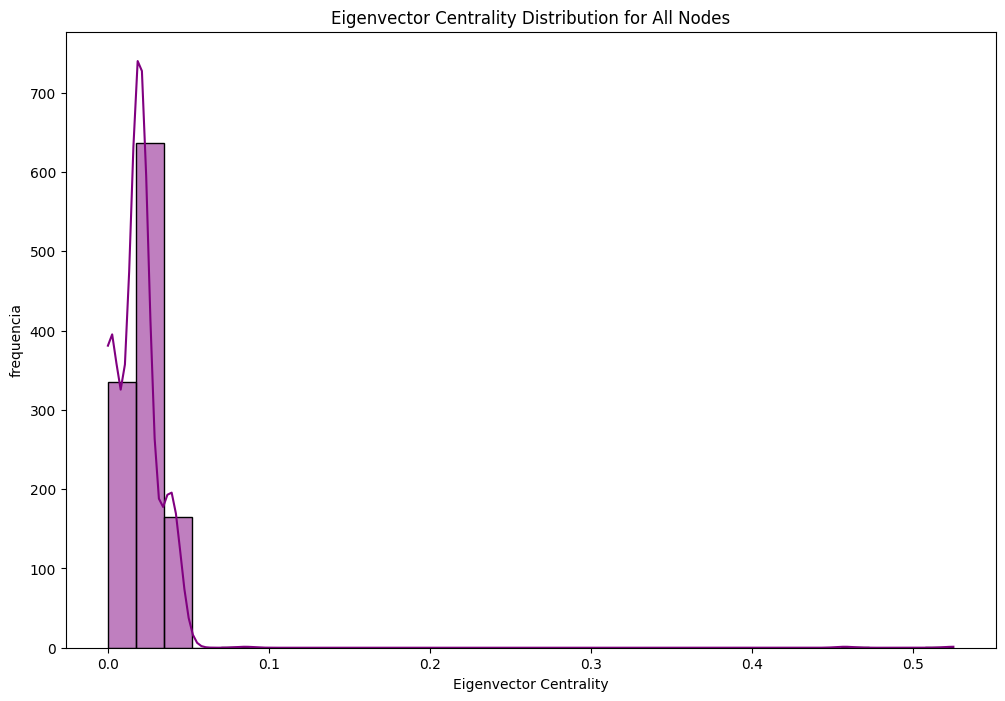

In [45]:
Eigenvector_Centrality = networkx.eigenvector_centrality(B,max_iter=2500, tol=1e-08)

df_between = pd.DataFrame(list(Eigenvector_Centrality.items()), columns=['Node', 'Eigenvector Centrality'])

plt.figure(figsize=(12, 8))
sns.histplot(df_between['Eigenvector Centrality'], bins=30, kde=True, color='purple')
plt.title('Eigenvector Centrality Distribution for All Nodes')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('frequencia')
plt.show()

## Assortativity

In [46]:
degree_assortativity = networkx.degree_assortativity_coefficient(B)
degree_assortativity

-0.47513656703852764

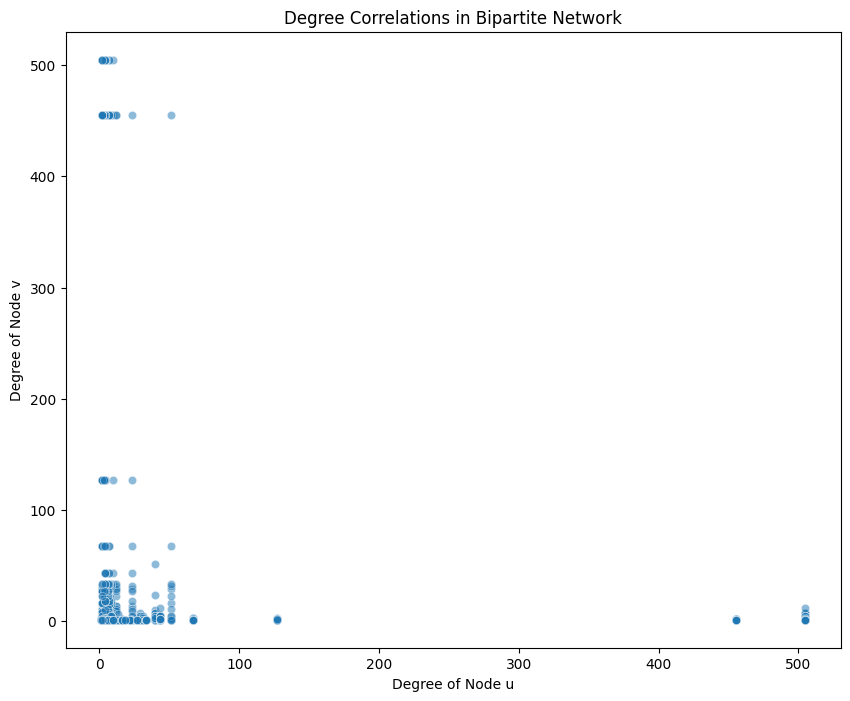

In [47]:
degree_pairs = [(G.degree(u), G.degree(v)) for u, v in G.edges()]
df_degree_pairs = pd.DataFrame(degree_pairs, columns=['Degree_u', 'Degree_v'])

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_degree_pairs, x='Degree_u', y='Degree_v', alpha=0.5)
plt.title('Degree Correlations in Bipartite Network')
plt.xlabel('Degree of Node u')
plt.ylabel('Degree of Node v')
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [48]:
dict(G.nodes(data=True))

{'151603712': {'degree': 40, 'modularity_class': 2},
 'The Elder Scrolls V Skyrim': {'degree': 7, 'modularity_class': 2},
 'Fallout 4': {'degree': 1, 'modularity_class': 2},
 'Spore': {'degree': 2, 'modularity_class': 2},
 'Fallout New Vegas': {'degree': 4, 'modularity_class': 1},
 'Left 4 Dead 2': {'degree': 10, 'modularity_class': 5},
 'HuniePop': {'degree': 1, 'modularity_class': 2},
 'Path of Exile': {'degree': 2, 'modularity_class': 2},
 'Poly Bridge': {'degree': 1, 'modularity_class': 2},
 'Left 4 Dead': {'degree': 5, 'modularity_class': 2},
 'Team Fortress 2': {'degree': 23, 'modularity_class': 2},
 'Tomb Raider': {'degree': 4, 'modularity_class': 2},
 'The Banner Saga': {'degree': 2, 'modularity_class': 2},
 'Dead Island Epidemic': {'degree': 7, 'modularity_class': 2},
 'BioShock Infinite': {'degree': 4, 'modularity_class': 7},
 'Dragon Age Origins - Ultimate Edition': {'degree': 2, 'modularity_class': 2},
 'Fallout 3 - Game of the Year Edition': {'degree': 2, 'modularity_class

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [49]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

degree  modularity_class
151603712                       40                 2
The Elder Scrolls V Skyrim       7                 2
Fallout 4                        1                 2
Spore                            2                 2
Fallout New Vegas                4                 1
...                            ...               ...
92173524                         3                 0
151229648                       10                 8
WAKFU                            1                 8
Starbound                        1                 8
PlanetSide 2                     1                 8

[1139 rows x 2 columns]